First, a number of constants related to circuit are defined. The circuit is basically a sine wave oscillator that feeds an RC or RL circuit.

In [21]:
from math import sqrt, pi

R = 1000 # Ohms
FREQ = 100 # Hertz
VOLTAGE = 5 # V

ACCURACY = 0.01
ADC_STEPS = 2896
ADC_VOLTAGE_REFERENCE = 2.5 # V
LSB = ADC_VOLTAGE_REFERENCE/ADC_STEPS # V
DIVISION_RATIO = 2

MINIMUM_ADC_VOLTAGE = (LSB/ACCURACY)
MAXIMUM_ADC_VOLTAGE = (ADC_VOLTAGE_REFERENCE - MINIMUM_ADC_VOLTAGE)


print(MAXIMUM_ADC_VOLTAGE)

2.4136740331491713


The following function gets the capacitance in the RC circuit given the voltage across the resistor. 

In [22]:
# CHANGE THE FUCKING FORMULA
def get_capacitance(Vr, resistor_value):
    I = Vr/resistor_value
    w = 2*pi*FREQ
    Xc = (VOLTAGE-Vr)/I
    return 1/(w*Xc)

Likewise, this function gets the inductance in the RL circuit given the voltage across the resistor. 

In [23]:
def get_inductance(Vr, resistor_value):
    w = 2*pi*FREQ
    inductance = ((1/((VOLTAGE/Vr)**2 - 1))*resistor_value**2)/w**2
    print(inductance)
    return inductance

In [24]:
from enum import Enum

DIGITS_TO_PRINT = 3

class Prefix(Enum):
    MICRO = 6
    NANO = 9
    PICO = 12


class Component(Enum):
    INDUCTOR = 1
    CAPACITOR = 2


def format_value(capacitance, component):
    unit = None

    if(component == Component.INDUCTOR):
        unit = 'H'
    elif(component == Component.CAPACITOR):
        unit = 'F'

    if(capacitance < 1e-3 and capacitance >= 1e-6):
        capacitance_microfarads = capacitance/10**(-1*Prefix.MICRO.value)
        return str(round(capacitance_microfarads, DIGITS_TO_PRINT)) + 'u' + unit
    elif(capacitance < 1e-6 and capacitance >= 1e-9):
        capacitance_nanofarads = capacitance/10**(-1*Prefix.NANO.value)
        return str(round(capacitance_nanofarads, DIGITS_TO_PRINT)) + 'n' + unit
    elif(capacitance < 1e-9):
        capacitance_picofarads = capacitance/10**(-1*Prefix.PICO.value)
        return str(round(capacitance_picofarads, DIGITS_TO_PRINT)) + 'p' + unit
    
assert format_value(1e-6, Component.CAPACITOR) == '1.0uF'
assert format_value(1e-12, Component.CAPACITOR) == '1.0pF'

In [25]:
def print_range():
    for i in range(1, 5):
        resistor_value = (10**i)*9

        max_first_digit = int(str(get_capacitance(MAXIMUM_ADC_VOLTAGE, resistor_value))[0])
        min_first_digit = int(str(get_capacitance(MINIMUM_ADC_VOLTAGE, resistor_value))[0])

        print(format_value(get_inductance(MAXIMUM_ADC_VOLTAGE*DIVISION_RATIO, resistor_value), Component.INDUCTOR))
        print(format_value(get_inductance(MINIMUM_ADC_VOLTAGE*DIVISION_RATIO, resistor_value), Component.INDUCTOR))

        print(format_value(get_capacitance(MAXIMUM_ADC_VOLTAGE*DIVISION_RATIO, resistor_value), Component.CAPACITOR))
        print(format_value(get_capacitance(MINIMUM_ADC_VOLTAGE*DIVISION_RATIO, resistor_value), Component.CAPACITOR))

        if(max_first_digit == 1 and min_first_digit == 1):
            print("Resistance: " + str(resistor_value) + " ohms")
            print(format_value(get_capacitance(MAXIMUM_ADC_VOLTAGE*DIVISION_RATIO, resistor_value), Component.CAPACITOR))
            print(format_value(get_capacitance(MINIMUM_ADC_VOLTAGE*DIVISION_RATIO, resistor_value), Component.CAPACITOR))

        if(max_first_digit == 2 and min_first_digit == 1):
            print("Resistance: " + str(resistor_value) + " ohms")
            print(format_value(get_capacitance(MAXIMUM_ADC_VOLTAGE*DIVISION_RATIO, resistor_value), Component.CAPACITOR))
            print(format_value(get_capacitance(MINIMUM_ADC_VOLTAGE*DIVISION_RATIO, resistor_value), Component.CAPACITOR))

        if(max_first_digit == 1 and min_first_digit == 2):
            print("Resistance: " + str(resistor_value) + " ohms")
            print(format_value(get_capacitance(MAXIMUM_ADC_VOLTAGE*DIVISION_RATIO, resistor_value), Component.CAPACITOR))
            print(format_value(get_capacitance(MINIMUM_ADC_VOLTAGE*DIVISION_RATIO, resistor_value), Component.CAPACITOR))
        
        if(max_first_digit == 2 and min_first_digit == 2):
            print("Resistance: " + str(resistor_value) + " ohms")
            print(format_value(get_capacitance(MAXIMUM_ADC_VOLTAGE*DIVISION_RATIO, resistor_value), Component.CAPACITOR))
            print(format_value(get_capacitance(MINIMUM_ADC_VOLTAGE*DIVISION_RATIO, resistor_value), Component.CAPACITOR))

print_range()

0.28179593559769683
None
2.4493243838199853e-05
24.493uH
494.441uF
632.471nF
28.179593559769682
None
0.0024493243838199855
None
49.444uF
63.247nF
2817.9593559769683
None
0.24493243838199852
None
4.944uF
6.325nF
281795.9355976968
None
24.493243838199856
None
494.441nF
632.471pF


In [26]:
w = 2*pi*100
Xc = 1/(w*1e-6)
Z = abs(1000 - 1j*Xc)
I = 5/Z
Vr = abs(I*1000)
Vout = abs(I*Xc)

print(Vout)



4.233665079824153


An optimal frequency must be found that can measure both capacitors and inductors in the desired range. Aproximatly (1pF - 1uF) for capacitors and (1nH - 10uH) for inductors. 

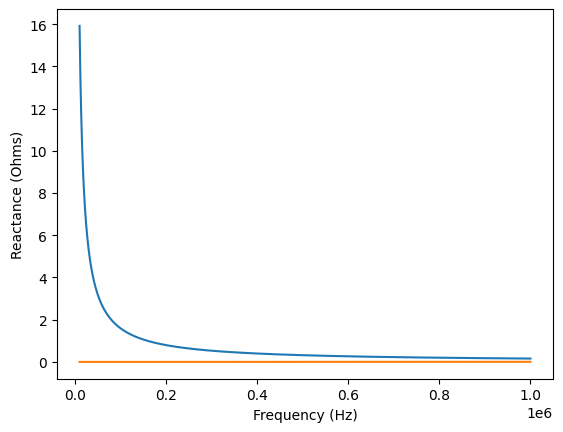

In [30]:
import matplotlib.pyplot as plt
from math import pi

INDUCTOR_VALUE = 1e-9
CAPACITOR_VALUE = 1e-6

def capacitor_reactance(f):
    return 1/(2*pi*f*CAPACITOR_VALUE)


def inductor_reactance(f):
    return 2*pi*f*INDUCTOR_VALUE

frequencies = [i for i in range(10000, 1000000)]

variable_capacitor_reactance = [capacitor_reactance(freq) for freq in frequencies]
variable_inductor_reactance = [inductor_reactance(freq) for freq in frequencies]

plt.plot(frequencies, variable_capacitor_reactance)
plt.plot(frequencies, variable_inductor_reactance)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Reactance (Ohms)')

plt.show()